간단한 이상 탐지 예제를 파이토치로 구현. 
이 예제에서는 One-class-SVM을 사용하여 데이터 이상을 탐지

In [2]:
import torch
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

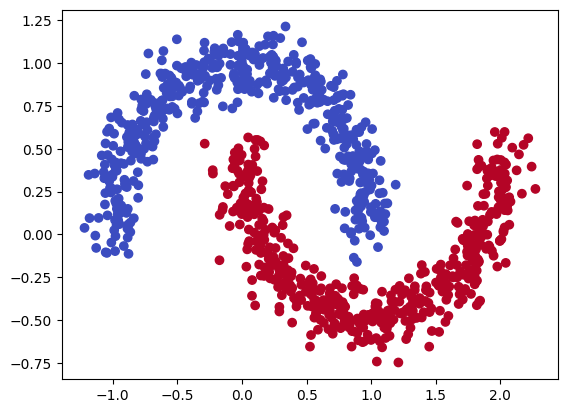

In [3]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# 데이터 시각화 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

In [4]:
# 이상 데이터 설정
outliers_ratio = 0.1 # 이상치 비율
n_outliers = int(outliers_ratio * len(X)) # 이상치 데이터 개수 
n_inliers = len(X) - n_outliers # 정상 데이터 개수 

rng = np.random.RandomState(42) # 난수 생성 객체
X_outliers = 1.5 * rng.uniform(low=-1, high = 3, size=(n_outliers, 2)) 
#이상치 데이터 생성 - 난수 생성을 이용해서 uniform 분포를 따르는 값을 생성 
# -> 1.5배 해서 이상치 데이터를 생성
X = np.vstack([X, X_outliers]) # 이상치 데이터에 기존 데이터 추가
y = np.hstack([y, -1 * np.ones(n_outliers)]) # 이상치 데이터의 클래스는 -1로 설정합니다.

In [5]:
# 데이터 정규화 
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 학습 및 평가 데이터 분리 
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# one-class SVM 모델 학습
model = OneClassSVM(nu = 0.05, kernel = 'rbf', gamma = 'auto')
model.fit(X_train)

# 이상 탐지 
y_pred = model.predict(X_test) # 수정된 부분
y_pred = np.where(y_pred == 1,0, y_pred) # 1을 0으로 , -1을 1로 변환
# score = f1_score(y_test, y_pred, pos_label=-1)
score = f1_score(y_test, y_pred, average='macro')

print(f"F1 score: {score:.4f}")

F1 score: 0.3746


In [ ]:
"""
F1 score 는 정밀도 와 재현율의 조화 평균으로 계산 됩니다.
 
정밀도 = TP / (TP + FP)
재현율 = TP / (TP + FN)
 
F1 score = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)
 
FN : 거짓 음성 -> 실제는 양성인데 음성이라고 하는 경우 
TP : 참 양성 -> 실제 양성인데 양성이라고 하는 경우 
FP : 거짓 양성 - > 실제는 음성인데 양성이라고 하는 경우 
"""

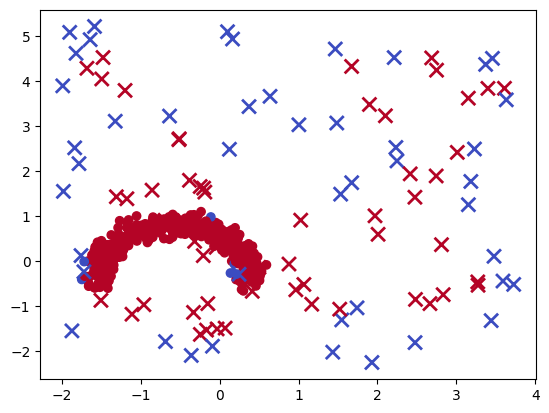

In [6]:
# 모든 데이터 포인트에 대한 예측 결과 얻기
y_pred_all = model.predict(X)
 
# 이상치 데이터와 정상 데이터를 분리하여 시각화
X_inliers = X[y == 0]
X_outliers = X[y == -1]
y_pred_inliers = y_pred_all[y == 0]
y_pred_outliers = y_pred_all[y == -1]
 
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], c=y_pred_inliers, cmap=plt.cm.coolwarm)
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c=y_pred_outliers, cmap=plt.cm.coolwarm, marker='x', 
            s=100, linewidth=2)
plt.show()